In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('Churn_Modelling.csv')

In [43]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [45]:
data.shape

(10000, 14)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [48]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [49]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [50]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [51]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [52]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
data_encoded = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [54]:
X = data_encoded.drop(columns=['Exited'])
y = data_encoded['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [61]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7507 - loss: 0.5833 - val_accuracy: 0.7975 - val_loss: 0.4718
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.4631 - val_accuracy: 0.8031 - val_loss: 0.4460
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4472 - val_accuracy: 0.8094 - val_loss: 0.4327
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8047 - loss: 0.4430 - val_accuracy: 0.8144 - val_loss: 0.4261
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8179 - loss: 0.4153 - val_accuracy: 0.8188 - val_loss: 0.4203
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.4214 - val_accuracy: 0.8175 - val_loss: 0.4162
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4179 - val_accuracy: 0.8225 - val_loss: 0.4102
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4018 - val_accu

In [62]:
model.layers[0].get_weights()

[array([[ 0.23583287, -0.66019934, -0.12093188, -0.23962738,  0.33773616,
          0.11573826, -0.05532431, -0.20908391,  0.21914913, -0.17507908,
          0.09088163],
        [ 1.4625541 , -0.11191034,  0.2635385 ,  1.0217628 ,  0.253399  ,
         -0.5984683 , -0.39638284,  0.23104765,  0.08895624,  0.7962294 ,
          0.63296676],
        [-0.03549806, -0.52678496,  0.08022936, -0.06789038,  0.09523088,
         -0.22001436, -0.51200885,  0.44599468,  0.03080173,  0.02554814,
          0.2524785 ],
        [-0.38032714,  0.06252779,  0.2892338 , -0.6831018 ,  0.01056093,
         -0.02524047, -0.15560444, -0.35906994, -0.2639616 ,  0.01385438,
          0.07691295],
        [ 0.10726358, -0.35697854,  1.2700493 , -0.8903797 , -0.8327273 ,
          0.02958949,  0.6192034 ,  0.5659378 , -0.04800473,  0.85926074,
         -0.01942383],
        [-0.14237235, -0.34946337, -0.03973681, -0.11400805, -0.35709178,
          0.84862626, -0.19465254,  0.5886388 , -0.9906401 ,  0.0080266

In [63]:
model.layers[1].get_weights()

[array([[ 0.39648843, -0.97690636, -0.49780774, -0.02102247,  0.53289926,
          0.5902175 , -1.0166764 ,  0.6834237 , -0.170841  , -0.32713726,
         -0.41514713],
        [-0.03023542,  0.1739607 , -0.34068564,  0.3697124 , -0.10113825,
         -0.7001311 , -0.19470054, -0.3733325 ,  0.23347574,  0.5566129 ,
          0.05487502],
        [-0.42088324,  0.16121967, -0.57194185, -1.3397895 ,  1.2201016 ,
          1.1724466 , -0.18039033, -0.47003213, -0.73303705, -0.27661985,
         -0.37216985],
        [ 0.05126999, -0.18966517,  0.03607072,  0.6737475 , -0.13146791,
          0.54310685, -0.6127075 ,  0.5193498 ,  0.14899015, -0.22247465,
         -0.12076102],
        [-0.4934876 ,  0.02743045, -0.82830775,  0.26861316,  0.4198046 ,
         -0.4566634 ,  0.44330117,  0.08067021,  0.3096112 , -0.03162229,
         -0.17259915],
        [ 0.07478422, -0.28420848,  0.6846189 , -0.27191222, -0.8750789 ,
         -0.14891665, -0.5496285 ,  0.29135433, -0.06857087,  0.3437151

In [64]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [65]:
y_pred = np.where(y_log>0.5,1,0)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [67]:
history.history

{'accuracy': [0.7817187309265137,
  0.7998437285423279,
  0.8048437237739563,
  0.8103125095367432,
  0.8145312666893005,
  0.8173437714576721,
  0.8217187523841858,
  0.8265625238418579,
  0.828906238079071,
  0.835156261920929,
  0.8407812714576721,
  0.8456249833106995,
  0.8514062762260437,
  0.8553125262260437,
  0.8587499856948853,
  0.8603125214576721,
  0.860156238079071,
  0.8614062666893005,
  0.86328125,
  0.864062488079071,
  0.8639062643051147,
  0.8648437261581421,
  0.8634374737739563,
  0.8651562333106995,
  0.8639062643051147,
  0.8659374713897705,
  0.8643749952316284,
  0.8656250238418579,
  0.8654687404632568,
  0.8637499809265137,
  0.8670312762260437,
  0.8667187690734863,
  0.864062488079071,
  0.8654687404632568,
  0.8657812476158142,
  0.8675000071525574,
  0.8670312762260437,
  0.8653125166893005,
  0.8665624856948853,
  0.8670312762260437,
  0.8656250238418579,
  0.8668749928474426,
  0.8656250238418579,
  0.866406261920929,
  0.8681250214576721,
  0.86796873

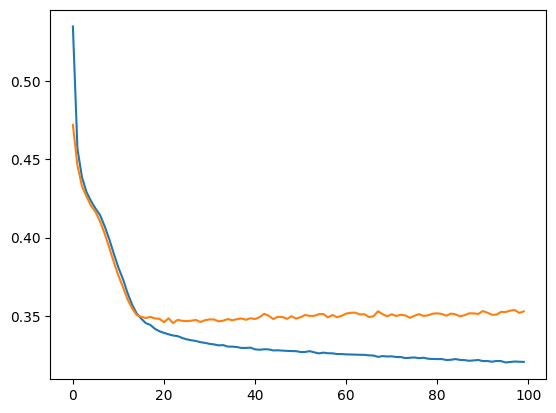

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

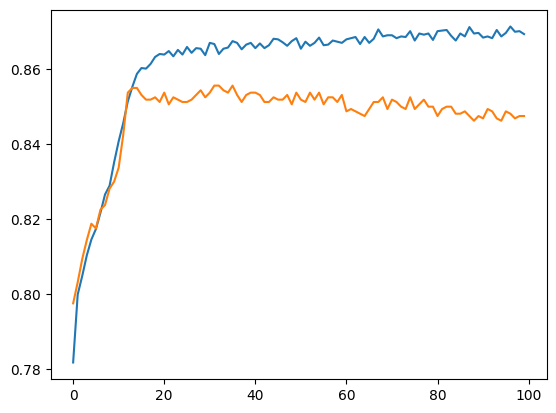

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])